In [1]:
import numpy as np
import matplotlib.pyplot as plt

# THIS SECTION CONTAINS ALL THE FUNCTIONS

## Function to compute the reward for investing in solar PV

In [2]:
def Reward_gain(w,LCOE,p):
    return w*0.005*(p-LCOE)

## Function to compute the carbon credits generated for investing in solar PV

In [3]:
def Carbon_credits_generated(Energy_production_kwh, Emissions_factor_kg_per_kwh):
  
    #CONVERSION OF THE EMISSION FACTOR FROM KG TO METRIC TONS
    Emissions_factor_tons_per_kwh=Emissions_factor_kg_per_kwh*0.001
    
    #TOTAL EMISSION REDUCED IN TONS
    Total_emissions_reduced_tons=Energy_production_kwh*Emissions_factor_tons_per_kwh
    
    #THE NUMBER OF CARBON CREDIT IS EQUAL TO THE TOTAL EMISSIONS REDUCED
    Carbon_credits=Total_emissions_reduced_tons
    
    return Carbon_credits


## Payoff functions for the Public-Private Partnership

### Private sector payoff

In [4]:
def Priv_sect_payoff_funct(Private_strategy,Public_strategy,I,C,il,l,alpha,beta):
    
    LCOER=0.048
    LCOEN=0.0925
    P_r=0.15
    P_n=0.15
    t=0.15 #Tax rate on energy sale
    u=9.84 #Unit price of a carbon credit in dollars
    E=0.17*0.001
    Efficacy_PV=0.23
    
    if (Private_strategy=='Investment in PV'):
        if (Public_strategy=='Support'):
            return (I/LCOER)*(P_r*(1-t)*Efficacy_PV+l*u*E*Efficacy_PV-LCOER)+C
        else:
            return (I/LCOER)*(P_r*(1-t)*Efficacy_PV+u*E*Efficacy_PV-LCOER)  
    else:
        if (Public_strategy=='Support'):
            return (I/LCOEN)*(P_n*(1-t)-LCOEN-alpha*u*E)+(alpha*u*E*il)/(LCOEN) 
        else:
            return (I/LCOEN)*(P_n*(1-t)-LCOEN-beta*u*E)+(beta*u*E*il)/(LCOEN)

### Public sector payoff

In [5]:
def Pub_sect_payoff_funct(Private_strategy, Public_strategy,I,C,il,l,alpha,beta):
    
    LCOER=0.048
    LCOEN=0.0925
    P_r=0.15
    P_n=0.15
    t=0.15
    u=9.84
    E=0.17*0.001
    Efficacy_PV=0.23
    
    if (Private_strategy=='Investment in PV'):
        if (Public_strategy=='Support'):
            return (I/LCOER)*(P_r*t*Efficacy_PV+(1-l)*u*E*Efficacy_PV)
        else:
            return (I*t*Efficacy_PV*P_r)/LCOER
    else:
        if (Public_strategy=='Support'):
            return (I/LCOEN)*(P_n*t+alpha*u*E)-(alpha*u*E*il)
        else:
            return (I/LCOEN)*(P_n*t+beta*u*E)-(beta*u*E*il)

## Cost saving of public and the private sectors  for investing in solar PV

In [6]:
def JointPayoffSolarPV(I,C,LCOE,p):
    E=0.17*0.001
    Eff_PV=0.23
    u=9.84
    
    p=(I/LCOE)*(p*Eff_PV+u*E-LCOE)+C
    return p

# In this section we have all other parameters and variables involve in the game

## Generating investment

In [7]:
#RANDOM SEED FOR REPRODUCTIBILITY
np.random.seed(0)

#$1 MILLION to $500 MILLIONS AS RANGE OF INVESTMENT
Imin=500000
Imax=5000000000
no=1000000
Invest=np.random.uniform(Imin,Imax,no)
Investment=np.sort(Invest)

## Other parameters

In [8]:
Life_time=30
LCOEn=0.0925
p_r=0.15
p_n=0.15
LCOEr=0.048
efficacy_PV=0.23
lambda_value=Investment/np.max(Investment)   #Fraction of carbon credit hold by the private sector
u=9.84
E=0.17*0.001

##STRATEGIES OF EACH PLAYER

Priv_sect_strat=['Investment in PV','No investement in PV'] # private sector strategy
Pub_sect_strat=['Support','No support'] # public sector strategy

## Electric power generated by solar PV

In [9]:
Life_time_energy_PV=(Investment/LCOEr)*efficacy_PV

## Carbon credits generated by solar PV

In [10]:
Emissions_factor_kg_per_kwh=0.17  # 0.17 kg CO2 per kWh

e=Emissions_factor_kg_per_kwh
n=Carbon_credits_generated(Life_time_energy_PV,e)

## Reward for investing in PV based on the public sector saving made on the energy demand

In [11]:
np.random.seed(0)
Wmin=500*1e6
Wmax=1000*1e6
Y_demand_kWh=np.random.uniform(Wmin,Wmax,no)
Yearly_demand_kWh=np.sort(Y_demand_kWh)
Life_time_demand_kWh=Yearly_demand_kWh*Life_time
Reward=Reward_gain(Life_time_demand_kWh,LCOEn,p_n)

## Electric power generated by fossil fuel

In [12]:
Life_time_energy_fuel=Investment/LCOEn

## Cap for generating power by fossil fuel

In [13]:
#FOR INSTANCE WE TAKE THE CAP OF POWER AS THE MEAN OF THE POWERS GENERATED BY THE INVESTMENTS
Wl=np.mean(Life_time_energy_fuel)

## Carbon credits generated by $W_n-W_l$

In [14]:
W=Life_time_energy_fuel-Wl
for i in range (len(W)):
    if (W[i]<0):
        W[i]=0
G=Carbon_credits_generated(W,e)

## Investment $I_l$ required for generating $W_n-W_l$

In [15]:
Il=LCOEn*W

## Penalty coefficients $\alpha$ and $\beta$

In [16]:
A=Il/np.max(Investment) # alpha's computation
B=W                     # beta computation
for i in range (len(B)):
    if (B[i]!=0):
        B[i]=1

# In this section we simulated each scenario in our game, it is about the public sector driving the game, the private driving the game and both sectors driving

## The public sector is driving 

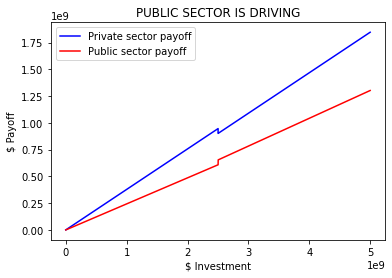

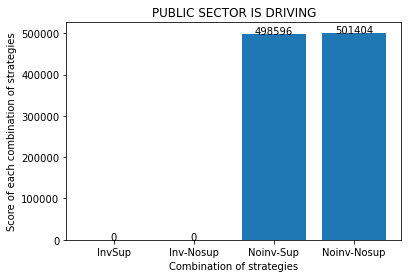

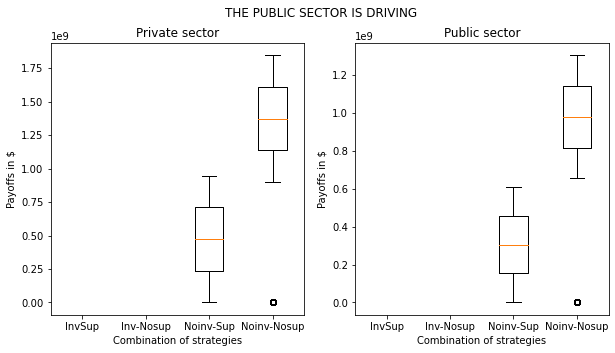

Median for Noinv-Sup for private sector : $ 474267549.33
Median  for Noinv-Nosup for private sector : $ 1373899116.55
IQR limits for Noinv-Sup for private sector : $ 237588501.21, 710766305.78
IQR limits for Noinv-Nosup for private sector : $ 1136161226.95, 1609840762.77
Whiskers limits for Noinv-Sup for private sector : $ 2129349.18, 946771664.06
Whiskers limits for Noinv-Nosup for private sector : $ 901524052.22, 1846640978.98
Median for Noinv-Sup for public sector : $ 304886281.72
Median  for Noinv-Nosup for public sector : $ 978049271.56
IQR limits for Noinv-Sup for public sector : $ 152735465.06, 456921196.57
IQR limits for Noinv-Nosup for public sector : $ 814906290.91, 1139959615.31
Whiskers limits for Noinv-Sup for public sector : $ 1368867.33, 608638926.89
Whiskers limits for Noinv-Nosup for public sector : $ 653891115.23, 1302459135.93
946771664.0561692


In [17]:
P_1=[]
P_2=[]
Counter1={'InvSup':0,'Inv-Nosup':0,'Noinv-Sup':0,'Noinv-Nosup':0}
PaymentPriv1={'InvSup':[],'Inv-Nosup':[],'Noinv-Sup':[],'Noinv-Nosup':[]}
PaymentPub1={'InvSup':[],'Inv-Nosup':[],'Noinv-Sup':[],'Noinv-Nosup':[]}
for I,C,il,l,alpha,beta in zip(Investment,Reward,Il,lambda_value,A,B):
    Priv_payoff_for_sup=[]
    Priv_payoff_for_no_sup=[]
    #OPTIMAL DECISION OF THE PRIVATE SECTOR FOR EACH PUBLIC SECTOR STRATEGY
    for Priv_strat in Priv_sect_strat: # public sector supporting
        Priv_payoff_for_sup.append(Priv_sect_payoff_funct(Priv_strat,Pub_sect_strat[0],I,C,il,l,alpha,beta))
    Best_priv_str_for_sup=Priv_sect_strat[np.argmax(Priv_payoff_for_sup)] #best strategy for supporting
    Best_priv_pay_for_sup=np.max(Priv_payoff_for_sup)#best payoff for supporting
    Pub_sect_payoff_for_sup=Pub_sect_payoff_funct(Best_priv_str_for_sup,Pub_sect_strat[0],I,C,il,l,alpha,beta)
    for Priv_strat in Priv_sect_strat: #public sector supporting for no supporting
        Priv_payoff_for_no_sup.append(Priv_sect_payoff_funct(Priv_strat,Pub_sect_strat[1],I,C,il,l,alpha,beta)) 
    Best_priv_str_for_no_sup=Priv_sect_strat[np.argmax(Priv_payoff_for_no_sup)]  #best strategy for no supporting
    Best_priv_pay_for_no_sup=np.max(Priv_payoff_for_no_sup)#best payoff for no supporting
    Pub_sect_payoff_for_no_sup=Pub_sect_payoff_funct(Best_priv_str_for_no_sup,Pub_sect_strat[1],I,C,il,l,alpha,beta)
    if (Pub_sect_payoff_for_sup>=Pub_sect_payoff_for_no_sup):
        if(Best_priv_str_for_sup==Priv_sect_strat[0]):
            Counter1['InvSup']+=1
            PaymentPriv1['InvSup'].append(Best_priv_pay_for_sup)
            PaymentPub1['InvSup'].append(Pub_sect_payoff_for_sup)
        else:
            Counter1['Noinv-Sup']+=1
            PaymentPriv1['Noinv-Sup'].append(Best_priv_pay_for_sup)
            PaymentPub1['Noinv-Sup'].append(Pub_sect_payoff_for_sup)
        #print('${:.2f} is the payoff of the private sector. Its strategy is {}'.format(Best_priv_pay_for_sup,Best_priv_str_for_sup))
        P_1.append(Best_priv_pay_for_sup)
        #print('${:.2f} is the payoff of the public sector. Its strategy is {}'.format(Pub_sect_payoff_for_sup,Pub_sect_strat[0]))
        P_2.append(Pub_sect_payoff_for_sup)
    else:
        if(Best_priv_str_for_no_sup==Priv_sect_strat[0]):
            Counter1['Inv-Nosup']+=1
            PaymentPriv1['Inv-Nosup'].append(Best_priv_pay_for_no_sup)
            PaymentPub1['Inv-Nosup'].append(Pub_sect_payoff_for_no_sup)
        else:
            Counter1['Noinv-Nosup']+=1
            PaymentPriv1['Noinv-Nosup'].append(Best_priv_pay_for_no_sup)
            PaymentPub1['Noinv-Nosup'].append(Pub_sect_payoff_for_no_sup)
        #print('${:.2f} is the payoff of the private sector. Its strategy is {}'.format(Best_priv_pay_for_no_sup,Best_priv_str_for_no_sup))
        P_1.append(Best_priv_pay_for_no_sup)
        #print('${:.2f} is the payoff of the public sector. Its strategy is {}'.format(Pub_sect_payoff_for_no_sup,Pub_sect_strat[1]))
        P_2.append(Pub_sect_payoff_for_no_sup)

import os
base_directory='/home/student03/Downloads/Josias/Project Phase/figures'
os.makedirs(base_directory, exist_ok=True)
plt.figure()
plt.plot(Investment,P_1,label='Private sector payoff', color='blue')
plt.plot(Investment,P_2,label='Public sector payoff', color='red')
plt.legend()
plt.xlabel('$ Investment')
plt.ylabel('$ Payoff')
plt.title('PUBLIC SECTOR IS DRIVING')
plt.savefig(os.path.join(base_directory,'PubDriv_payoffs.png'))
plt.show()
plt.close()


# Extracting keys and values from the dictionary
labels = list(Counter1.keys())
sizes = list(Counter1.values())

# Plotting the bar chart
plt.figure()
plt.bar(labels, sizes)

# Adding labels and title
plt.xlabel('Combination of strategies')
plt.ylabel('Score of each combination of strategies')
plt.title('PUBLIC SECTOR IS DRIVING')

# Adding value labels to each bar
for i, size in enumerate(sizes):
    plt.text(i, size + 0.1, str(size), ha='center')
plt.savefig(os.path.join(base_directory,'PubDriv_barPlot.png'))
plt.show()
plt.close()

#labels = list(data_dict.keys())
import numpy as np
import matplotlib.pyplot as plt

# Assuming PaymentPriv1 and PaymentPub1 are dictionaries containing your data

# Convert dictionary values to NumPy arrays
data1 = list(PaymentPriv1.values()) 
data2 = list(PaymentPub1.values())


# Create box plots
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.boxplot(data1)
plt.xlabel('Combination of strategies')
plt.ylabel('Payoffs in $')
plt.title('Private sector')
plt.xticks(range(1, len(labels) + 1), labels)

plt.subplot(1, 2, 2)
plt.boxplot(data2)
plt.xlabel('Combination of strategies')
plt.ylabel('Payoffs in $')
plt.title('Public sector')
plt.xticks(range(1, len(labels) + 1), labels)

plt.suptitle('THE PUBLIC SECTOR IS DRIVING')
plt.savefig(os.path.join(base_directory,'PubDriv_boxPlot.png'))
plt.show()
plt.close()

# Calculate statistics
Data1,Data2=np.array(PaymentPriv1['Noinv-Sup']),np.array(PaymentPriv1['Noinv-Nosup'])
Data3,Data4=np.array(PaymentPub1['Noinv-Sup']),np.array(PaymentPub1['Noinv-Nosup'])
median1,median2,median3,median4=np.median(Data1),np.median(Data2),np.median(Data3),np.median(Data4)
q11,q12,q13,q14=np.percentile(Data1,25),np.percentile(Data2,25),np.percentile(Data3,25),np.percentile(Data4, 25)
q21,q22,q23,q24=np.percentile(Data1,75),np.percentile(Data2,75),np.percentile(Data3,75),np.percentile(Data4, 75)
iqr1,iqr2,iqr3,iqr4= q21-q11,q22-q12,q23-q13,q24-q14
whisker_low1,whisker_low2,whisker_low3,whisker_low4=np.min(Data1[Data1>=q11-1.5*iqr1]),np.min(Data2[Data2>=q12-1.5*iqr2]),np.min(Data3[Data3>=q13-1.5*iqr3]),np.min(Data4[Data4>=q14-1.5*iqr4])
whisker_high1,whisker_high2,whisker_high3,whisker_high4=np.max(Data1[Data1<=q21+1.5*iqr1]),np.max(Data2[Data2<=q22+1.5*iqr2]),np.max(Data3[Data3<=q23+1.5*iqr3]),np.max(Data4[Data4<=q24+1.5*iqr4])

# Print the statistics
print(f"Median for Noinv-Sup for private sector : $ {median1:.2f}")
print(f"Median  for Noinv-Nosup for private sector : $ {median2:.2f}")
print(f"IQR limits for Noinv-Sup for private sector : $ {q11:.2f}, {q21:.2f}")
print(f"IQR limits for Noinv-Nosup for private sector : $ {q12:.2f}, {q22:.2f}")
print(f"Whiskers limits for Noinv-Sup for private sector : $ {whisker_low1:.2f}, {whisker_high1:.2f}")
print(f"Whiskers limits for Noinv-Nosup for private sector : $ {whisker_low2:.2f}, {whisker_high2:.2f}")

print(f"Median for Noinv-Sup for public sector : $ {median3:.2f}")
print(f"Median  for Noinv-Nosup for public sector : $ {median4:.2f}")
print(f"IQR limits for Noinv-Sup for public sector : $ {q13:.2f}, {q23:.2f}")
print(f"IQR limits for Noinv-Nosup for public sector : $ {q14:.2f}, {q24:.2f}")
print(f"Whiskers limits for Noinv-Sup for public sector : $ {whisker_low3:.2f}, {whisker_high3:.2f}")
print(f"Whiskers limits for Noinv-Nosup for public sector : $ {whisker_low4:.2f}, {whisker_high4:.2f}")

pp=0
for p in P_1:
    if pp<p:
        pp=p
    else:
        break
print(pp)

## The private sector is driving

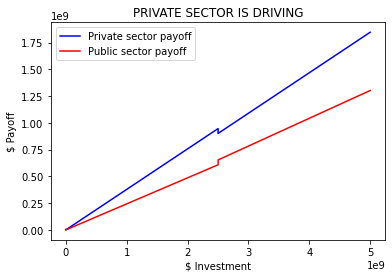

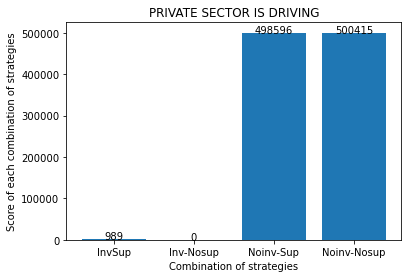

<Figure size 432x288 with 0 Axes>

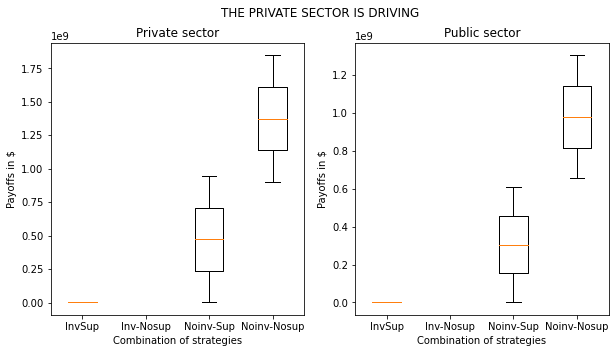

Median for InvSup for private sector : $ 3116833.14
Median for Noinv-Sup for private sector : $ 474267549.33
Median  for Noinv-Nosup for private sector : $ 1374859826.27
IQR limits for InvSup for private sector : $ 2588855.30, 3620615.75
IQR limits for Noinv-Sup for private sector : $ 237588501.21, 710766305.78
IQR limits for Noinv-Nosup for private sector : $ 1137492520.55, 1610292900.08
Whiskers limits for InvSup for private sector : $ 2130139.57, 4116596.77
Whiskers limits for Noinv-Sup for private sector : $ 2129349.18, 946771664.06
Whiskers limits for Noinv-Nosup for private sector : $ 901524052.22, 1846640978.98
Median for InvSup for public sector : $ 356614.21
Median for Noinv-Sup for public sector : $ 304886281.72
Median  for Noinv-Nosup for public sector : $ 978708539.84
IQR limits for InvSup for public sector : $ 206306.66, 514136.54
IQR limits for Noinv-Sup for public sector : $ 152735465.06, 456921196.57
IQR limits for Noinv-Nosup for public sector : $ 815819865.12, 1140269

In [18]:
P_3=[]
P_4=[]
Counter2={'InvSup':0,'Inv-Nosup':0,'Noinv-Sup':0,'Noinv-Nosup':0}
PaymentPriv2={'InvSup':[],'Inv-Nosup':[],'Noinv-Sup':[],'Noinv-Nosup':[]}
PaymentPub2={'InvSup':[],'Inv-Nosup':[],'Noinv-Sup':[],'Noinv-Nosup':[]}
for I,C,il,l,alpha,beta in zip(Investment,Reward,Il,lambda_value,A,B):
    Pub_payoff_for_inv=[]
    Pub_payoff_for_no_inv=[]
    #OPTIMAL DECISION OF THE PUBLIC SECTOR FOR EACH PRIVATE SECTOR STRATEGY
    for Pub_strat in Pub_sect_strat: # private sector investing
        Pub_payoff_for_inv.append(Pub_sect_payoff_funct(Priv_sect_strat[0],Pub_strat,I,C,il,l,alpha,beta))
    Best_pub_str_for_inv=Pub_sect_strat[np.argmax(Pub_payoff_for_inv)] #best strategy for investing in PV
    Best_pub_pay_for_inv=np.max(Pub_payoff_for_inv)#best payoff for investing in PV
    Priv_sect_payoff_for_inv=Priv_sect_payoff_funct(Priv_sect_strat[0],Best_pub_str_for_inv,I,C,il,l,alpha,beta)
    for Pub_strat in Pub_sect_strat: # private sector no investing
        Pub_payoff_for_no_inv.append(Pub_sect_payoff_funct(Priv_sect_strat[1],Pub_strat,I,C,il,l,alpha,beta))
    Best_pub_str_for_no_inv=Pub_sect_strat[np.argmax(Pub_payoff_for_no_inv)] #best strategy for no investing in PV
    Best_pub_pay_for_no_inv=np.max(Pub_payoff_for_no_inv)#best payoff for no investing in PV
    Priv_sect_payoff_for_no_inv=Priv_sect_payoff_funct(Priv_sect_strat[1],Best_pub_str_for_no_inv,I,C,il,l,alpha,beta)
    if (Priv_sect_payoff_for_inv>=Priv_sect_payoff_for_no_inv):
        if(Best_pub_str_for_inv==Pub_sect_strat[0]):
            Counter2['InvSup']+=1
            PaymentPriv2['InvSup'].append(Priv_sect_payoff_for_inv)
            PaymentPub2['InvSup'].append(Best_pub_pay_for_inv)
        else:
            Counter2['Inv-Nosup']+=1
            PaymentPriv2['Inv-Nosup'].append(Priv_sect_payoff_for_inv)
            PaymentPub2['Inv-Nosup'].append(Best_pub_pay_for_inv)
        #print('${:.2f} is the payoff of the private sector. Its strategy is {}'.format(Priv_sect_payoff_for_inv,Priv_sect_strat[0]))
        P_3.append(Priv_sect_payoff_for_inv)
        #print('${:.2f} is the payoff of the public sector. Its strategy is {}'.format(Best_pub_pay_for_inv,Best_pub_str_for_inv))
        P_4.append(Best_pub_pay_for_inv)
    else:
        if(Best_pub_str_for_no_inv==Pub_sect_strat[0]):
            Counter2['Noinv-Sup']+=1
            PaymentPriv2['Noinv-Sup'].append(Priv_sect_payoff_for_no_inv)
            PaymentPub2['Noinv-Sup'].append(Best_pub_pay_for_no_inv)
        else:
            Counter2['Noinv-Nosup']+=1
            PaymentPriv2['Noinv-Nosup'].append(Priv_sect_payoff_for_no_inv)
            PaymentPub2['Noinv-Nosup'].append(Best_pub_pay_for_no_inv)
        #print('${:.2f} is the payoff of the private sector. Its strategy is {}'.format(Priv_sect_payoff_for_no_inv,Priv_sect_strat[1]))
        P_3.append(Priv_sect_payoff_for_no_inv)
        #print('${:.2f} is the payoff of the public sector. Its strategy is {}'.format(Best_pub_pay_for_no_inv,Best_pub_str_for_no_inv))
        P_4.append(Best_pub_pay_for_no_inv)

plt.figure()
plt.plot(Investment,P_3,label='Private sector payoff', color='blue')
plt.plot(Investment,P_4,label='Public sector payoff', color='red')
plt.legend()

plt.xlabel('$ Investment')
plt.ylabel('$ Payoff')
plt.title('PRIVATE SECTOR IS DRIVING')

plt.savefig(os.path.join(base_directory,'PrivDriv_payoffs.png'))
plt.show()
plt.close()

# Extracting keys and values from the dictionary
labels = list(Counter2.keys())
sizes = list(Counter2.values())

# Plotting the bar chart
plt.figure()
plt.bar(labels, sizes)

# Adding labels and title
plt.xlabel('Combination of strategies')
plt.ylabel('Score of each combination of strategies')
plt.title('PRIVATE SECTOR IS DRIVING')

# Adding value labels to each bar
for i, size in enumerate(sizes):
    plt.text(i, size + 0.1, str(size), ha='center')

# Displaying the plot
plt.savefig(os.path.join(base_directory,'PrivDriv_barPlot.png'))
plt.show()
plt.close()  


data3 = list(PaymentPriv2.values()) 
data4 = list(PaymentPub2.values())
plt.figure()
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.boxplot(data3)
plt.xlabel('Combination of strategies')
plt.ylabel('Payoffs in $')
plt.title('Private sector')
plt.xticks(range(1, len(labels) + 1), labels)

plt.subplot(1, 2, 2)
plt.boxplot(data4)
plt.xlabel('Combination of strategies')
plt.ylabel('Payoffs in $')
plt.title('Public sector')
plt.xticks(range(1, len(labels) + 1), labels)

plt.suptitle('THE PRIVATE SECTOR IS DRIVING')
plt.savefig(os.path.join(base_directory,'PrivDriv_boxPlot.png'))
plt.show()
plt.close()

# Calculate statistics
Data1,Data2,Data3=np.array(PaymentPriv2['InvSup']),np.array(PaymentPriv2['Noinv-Sup']),np.array(PaymentPriv2['Noinv-Nosup'])
Data4,Data5,Data6=np.array(PaymentPub2['InvSup']),np.array(PaymentPub2['Noinv-Sup']),np.array(PaymentPub2['Noinv-Nosup'])
median1,median2,median3,median4,median5,median6=np.median(Data1),np.median(Data2),np.median(Data3),np.median(Data4),np.median(Data5),np.median(Data6)
q11,q12,q13,q14,q15,q16=np.percentile(Data1,25),np.percentile(Data2,25),np.percentile(Data3,25),np.percentile(Data4,25),np.percentile(Data5,25),np.percentile(Data6,25)
q21,q22,q23,q24,q25,q26=np.percentile(Data1,75),np.percentile(Data2,75),np.percentile(Data3,75),np.percentile(Data4,75),np.percentile(Data5,75),np.percentile(Data6,75)
iqr1,iqr2,iqr3,iqr4,iqr5,iqr6= q21-q11,q22-q12,q23-q13,q24-q14,q25-q15,q26-q16
whisker_low1,whisker_low2,whisker_low3,whisker_low4,whisker_low5,whisker_low6=np.min(Data1[Data1>=q11-1.5*iqr1]),np.min(Data2[Data2>=q12-1.5*iqr2]),np.min(Data3[Data3>=q13-1.5*iqr3]),np.min(Data4[Data4>=q14-1.5*iqr4]),np.min(Data5[Data5>=q15-1.5*iqr5]),np.min(Data6[Data6>=q16-1.5*iqr6])
whisker_high1,whisker_high2,whisker_high3,whisker_high4,whisker_high5,whisker_high6=np.max(Data1[Data1<=q21+1.5*iqr1]),np.max(Data2[Data2<=q22+1.5*iqr2]),np.max(Data3[Data3<=q23+1.5*iqr3]),np.max(Data4[Data4<=q24+1.5*iqr4]),np.max(Data5[Data5<=q25+1.5*iqr5]),np.max(Data6[Data6<=q26+1.5*iqr6])

# Print the statistics
print(f"Median for InvSup for private sector : $ {median1:.2f}")
print(f"Median for Noinv-Sup for private sector : $ {median2:.2f}")
print(f"Median  for Noinv-Nosup for private sector : $ {median3:.2f}")

print(f"IQR limits for InvSup for private sector : $ {q11:.2f}, {q21:.2f}")
print(f"IQR limits for Noinv-Sup for private sector : $ {q12:.2f}, {q22:.2f}")
print(f"IQR limits for Noinv-Nosup for private sector : $ {q13:.2f}, {q23:.2f}")

print(f"Whiskers limits for InvSup for private sector : $ {whisker_low1:.2f}, {whisker_high1:.2f}")
print(f"Whiskers limits for Noinv-Sup for private sector : $ {whisker_low2:.2f}, {whisker_high2:.2f}")
print(f"Whiskers limits for Noinv-Nosup for private sector : $ {whisker_low3:.2f}, {whisker_high3:.2f}")


print(f"Median for InvSup for public sector : $ {median4:.2f}")
print(f"Median for Noinv-Sup for public sector : $ {median5:.2f}")
print(f"Median  for Noinv-Nosup for public sector : $ {median6:.2f}")

print(f"IQR limits for InvSup for public sector : $ {q14:.2f}, {q24:.2f}")
print(f"IQR limits for Noinv-Sup for public sector : $ {q15:.2f}, {q25:.2f}")
print(f"IQR limits for Noinv-Nosup for public sector : $ {q16:.2f}, {q26:.2f}")

print(f"Whiskers limits for InvSup for public sector : $ {whisker_low4:.2f}, {whisker_high4:.2f}")
print(f"Whiskers limits for Noinv-Sup for public sector : $ {whisker_low5:.2f}, {whisker_high5:.2f}")
print(f"Whiskers limits for Noinv-Nosup for public sector : $ {whisker_low6:.2f}, {whisker_high6:.2f}")



## Joint decision-making: both sectors are driving 

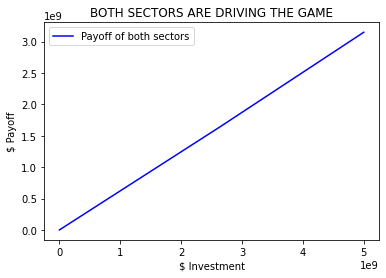

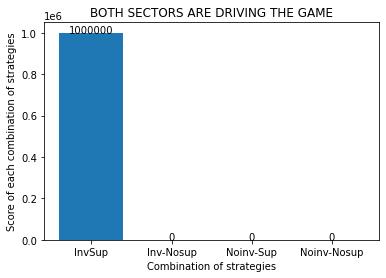

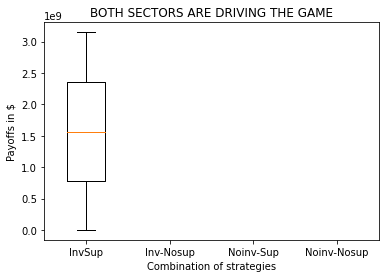

Median for InvSup for joint-decision making : $ 1556755118.94
IQR limits for InvSup for joint-decision making : $ 778268074.03, 2354238245.46
Whiskers limits for InvSup for joint-decision making : $ 313008.40, 3149100114.92


In [19]:
P_5=[]
Counter3={'InvSup':0,'Inv-Nosup':0,'Noinv-Sup':0,'Noinv-Nosup':0}
JoinPayment={'InvSup':[],'Inv-Nosup':[],'Noinv-Sup':[],'Noinv-Nosup':[]}
for I,C,il,l,alpha,beta in zip(Investment,Reward,Il,lambda_value,A,B):
    pay=[]
    Strategies=['Support-Investment in PV','Support-No investment in PV','No support-Investment in PV','No support-No investment in PV']
    for Stra in Strategies:
        if (Stra==Strategies[0]):
            pay.append(Priv_sect_payoff_funct(Pub_sect_strat[0],Priv_sect_strat[0],I,C,il,l,alpha,beta)+Pub_sect_payoff_funct(Pub_sect_strat[0],Priv_sect_strat[0],I,C,il,l,alpha,beta))
        elif (Stra==Strategies[1]):
            pay.append(Priv_sect_payoff_funct(Pub_sect_strat[0],Priv_sect_strat[1],I,C,il,l,alpha,beta)+Pub_sect_payoff_funct(Pub_sect_strat[0],Priv_sect_strat[1],I,C,il,l,alpha,beta))
        elif (Stra==Strategies[2]):
            pay.append(Priv_sect_payoff_funct(Pub_sect_strat[1],Priv_sect_strat[0],I,C,il,l,alpha,beta)+Pub_sect_payoff_funct(Pub_sect_strat[1],Priv_sect_strat[0],I,C,il,l,alpha,beta))
        else:
            pay.append(Priv_sect_payoff_funct(Pub_sect_strat[1],Priv_sect_strat[1],I,C,il,l,alpha,beta)+Pub_sect_payoff_funct(Pub_sect_strat[1],Priv_sect_strat[1],I,C,il,l,alpha,beta))
    Best_strategy=Strategies[np.argmax(pay)]
    if(Best_strategy==Strategies[0]):
        Counter3['InvSup']+=1
        JoinPayment['InvSup'].append(np.max(pay))
    elif(Best_strategy==Strategies[1]):
        Counter3['Inv-Nosup']+=1
        JoinPayment['Inv-Nosup'].append(np.max(pay))
    elif(Best_strategy==Strategies[2]):
        Counter3['Noinv-Sup']+=1
        JoinPayment['Noinv-Sup'].append(np.max(pay))
    else:
        Counter3['Noinv-Nosup']+=1
        JoinPayment['Noinv-Nosup'].append(np.max(pay))
    Best_payoff=np.max(pay)
    P_5.append(Best_payoff)
    #print('${:.2f} is the payoff of both the public and private sectors. Their strategies are {}'.format(Best_payoff,Best_strategy))
plt.figure()
plt.plot(Investment,P_5,label='Payoff of both sectors', color='blue')
plt.legend()

plt.xlabel('$ Investment')
plt.ylabel('$ Payoff')
plt.title('BOTH SECTORS ARE DRIVING THE GAME')

plt.savefig(os.path.join(base_directory,'JoinDec_payoffs.png'))
plt.show()
plt.close()
# Extracting keys and values from the dictionary
labels = list(Counter3.keys())
sizes = list(Counter3.values())

# Plotting the bar chart
plt.figure()
plt.bar(labels, sizes)

# Adding labels and title
plt.xlabel('Combination of strategies')
plt.ylabel('Score of each combination of strategies')
plt.title('BOTH SECTORS ARE DRIVING THE GAME')

# Adding value labels to each bar
for i, size in enumerate(sizes):
    plt.text(i, size + 0.1, str(size), ha='center')

# Displaying the plot
plt.savefig(os.path.join(base_directory,'JointDec_barPlot.png'))
plt.show()
plt.close()  

data5 = list(JoinPayment.values()) 
plt.figure()
plt.boxplot(data5)
plt.xlabel('Combination of strategies')
plt.ylabel('Payoffs in $')
plt.title('BOTH SECTORS ARE DRIVING THE GAME')
plt.xticks(range(1, len(labels) + 1), labels)
plt.savefig(os.path.join(base_directory,'JointDec_boxPlot.png'))
plt.show()
plt.close()


# Calculate statistics
Data=np.array(JoinPayment['InvSup'])
median=np.median(Data)
q1,q2=np.percentile(Data,25),np.percentile(Data,75)
iqr= q2-q1
whisker_low=np.min(Data[Data>=q1-1.5*iqr])
whisker_high=np.max(Data[Data<=q2+1.5*iqr])

# Print the statistics
print(f"Median for InvSup for joint-decision making : $ {median:.2f}")
print(f"IQR limits for InvSup for joint-decision making : $ {q1:.2f}, {q2:.2f}")
print(f"Whiskers limits for InvSup for joint-decision making : $ {whisker_low:.2f}, {whisker_high:.2f}")


# In this simulation, we studied the case of the Republic of Benin, whose electricity consumption is approximately 524.08 million kilowatt-hours per year

## Daily demand of electricity

In [20]:
Annual_demand_kWh=524.08*1e6
Daily_demand_kWh=Annual_demand_kWh/365

## Solar PV electric power generated by each investment of the private sector per day

In [21]:
Daily_demand_kWh_PV=Life_time_energy_PV/(Life_time*365)

##  The public and private sectors invest LCOEr to produce 1 kWh of electricity generated by solar PV and sell 1 kWh at pr. Conversely, the public sector invests LCOEn to purchase 1 kWh of electricity generated by fossil fuel and sells it at pn per unit of kWh

###  Profit generated by fossil fuel power generated per day

In [22]:
Daily_demand_kWh_fossil_fuel = np.array(Daily_demand_kWh - Daily_demand_kWh_PV)
Daily_demand_kWh_fossil_fuel = np.maximum(Daily_demand_kWh_fossil_fuel, 0)
Daily_investment_fossil_fuel=Daily_demand_kWh_fossil_fuel*LCOEn
Daily_profit_fossil_fuel=(Daily_demand_kWh_fossil_fuel*p_n)-Daily_investment_fossil_fuel
Daily_c=Reward_gain(Daily_demand_kWh_fossil_fuel,LCOEn,p_n)
Daily_profit_fossil_fuel=Daily_profit_fossil_fuel-Daily_c
Daily_profit_fossil_fuel

array([82135.13874165, 82135.06031708, 82134.85795494, ...,
           0.        ,     0.        ,     0.        ])

In [23]:
Daily_investment_PV=(LCOEr*Daily_demand_kWh_PV)/efficacy_PV
Daily_n=Carbon_credits_generated(Daily_demand_kWh_PV,e)
Daily_profit_joint_decision_making=[]
for I,C in zip(Daily_investment_PV,Daily_c):
    Daily_profit_joint_decision_making.append(JointPayoffSolarPV(I,C,LCOEr,p_r))
Daily_profit_joint_decision_making

[401.4086979571418,
 401.33781583696845,
 401.15491580428966,
 401.1141736801615,
 401.0627433215826,
 400.80484550967896,
 400.7211721816876,
 400.551352479372,
 400.5435111463951,
 400.1620350358245,
 399.9566564933216,
 399.8336545564571,
 399.64969559984377,
 399.2886633126864,
 399.2377698436169,
 399.13345946709757,
 399.0555651934851,
 398.9794745237722,
 398.86690598769064,
 398.8411534669257,
 398.3386010329162,
 398.2859839605411,
 398.1833776998032,
 398.1460790818884,
 398.0543693793234,
 397.9936690344046,
 397.7391555188678,
 397.617350119907,
 397.57501879326657,
 397.5168356569881,
 397.4062050939234,
 397.3888900012709,
 397.328784767473,
 397.26210090392186,
 397.25369305735245,
 397.09871407994615,
 396.857959239734,
 396.8039438838332,
 396.6548996577805,
 396.5884310934453,
 396.42424026413283,
 396.3605259901532,
 396.3552653524579,
 396.1670350192579,
 396.1399587138786,
 396.12283697803093,
 396.0868506062902,
 396.027279792495,
 395.96879071494124,
 395.6182114

###  Solar PV electric power generated for each investment per day vs fossil fuel electric power to satisfy the daily energy demand

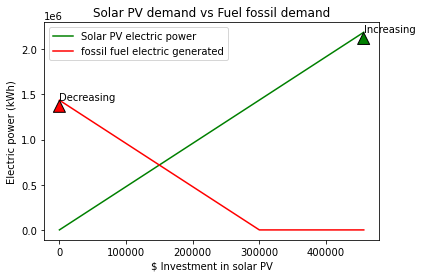

In [24]:
plt.figure()
plt.plot(Daily_investment_PV,Daily_demand_kWh_PV,label='Solar PV electric power',color='green')
plt.annotate('Increasing', xy=(Daily_investment_PV[-500],Daily_demand_kWh_PV[-500])
             , xytext=(Daily_investment_PV[-500]-0.5,Daily_demand_kWh_PV[-500]-2),arrowprops=dict(facecolor='green', shrink=0.05))
plt.plot(Daily_investment_PV,Daily_demand_kWh_fossil_fuel,label='fossil fuel electric generated',color='red')
plt.annotate('Decreasing', xy=(Daily_investment_PV[0], Daily_demand_kWh_fossil_fuel[-0])
             , xytext=(Daily_investment_PV[0]-0.5,Daily_demand_kWh_fossil_fuel[0]-2),
             arrowprops=dict(facecolor='red', shrink=0.05))
plt.legend()

plt.xlabel('$ Investment in solar PV')
plt.ylabel('Electric power (kWh)')
plt.title('Solar PV demand vs Fuel fossil demand')
plt.savefig(os.path.join(base_directory,'Solar PV demand vs Fuel fossil demand'))
plt.show()
plt.close()
#Daily_demand_kWh-Daily_demand_kWh_PV

###  Solar PV profit vs fossil fuel in term of profit

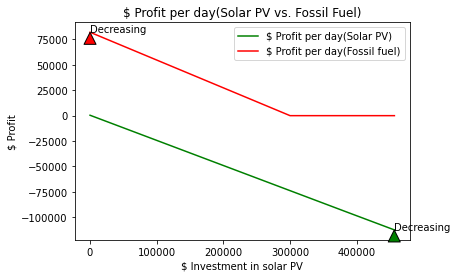

In [25]:
plt.figure()
plt.plot(Daily_investment_PV,Daily_profit_joint_decision_making,label='$ Profit per day(Solar PV)',color='green')
#plt.plot(Daily_investment_fossil_fuel,Daily_profit_fossil_fuel,label='fossil fuel electric generated')
plt.annotate('Decreasing', xy=(Daily_investment_PV[-500], Daily_profit_joint_decision_making[-500])
             , xytext=(Daily_investment_PV[-500]-0.5, Daily_profit_joint_decision_making[-500]-2),arrowprops=dict(facecolor='green', shrink=0.05))

plt.plot(Daily_investment_PV,Daily_profit_fossil_fuel,label='$ Profit per day(Fossil fuel)',color='red')
plt.annotate('Decreasing', xy=(Daily_investment_PV[0], Daily_profit_fossil_fuel[0])
             , xytext=(Daily_investment_PV[0]-0.5, Daily_profit_fossil_fuel[0]-2),
             arrowprops=dict(facecolor='red', shrink=0.05))
plt.legend()

plt.xlabel('$ Investment in solar PV')
plt.ylabel('$ Profit')
plt.title('$ Profit per day(Solar PV vs. Fossil Fuel)')
#plt.legend()
plt.savefig(os.path.join(base_directory,' Profit per day (Solar PV vs Fossil Fuel)'))
plt.show()
plt.close()